## Linear Regression
***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

from utils.data_manipulation import train_test_split, polynomial_features
from utils.data_operation import mean_squared_error
from utils.misc import Plot

from supervised_learning.regression import LinearRegression

%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

n_samples, n_features = np.shape(X)

In [3]:
model = LinearRegression(n_iterations=100)
model.fit(X_train, y_train)

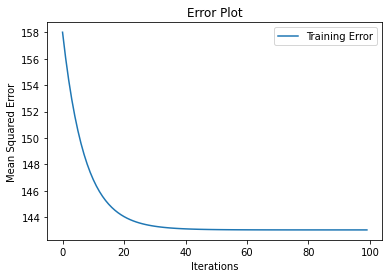

In [4]:
# Plot of the training error
n = len(model.training_errors)
training, = plt.plot(range(n), model.training_errors, label="Training Error")
plt.legend(handles=[training])
plt.title("Error Plot")
plt.ylabel("Mean Squared Error")
plt.xlabel("Iterations")
plt.show()

In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %s" % (mse))

Mean squared error: 579.8469029702483


In [6]:
y_pred_line = model.predict(X)

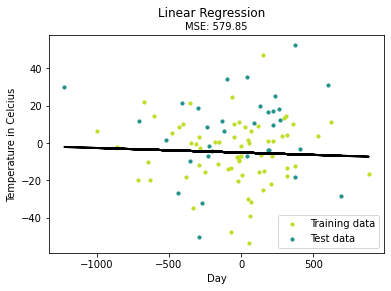

In [7]:
cmap = plt.get_cmap('viridis')

m1 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
plt.plot(366 * X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.suptitle("Linear Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.xlabel("Day")
plt.ylabel("Temperature in Celcius")
plt.legend((m1, m2), ("Training data", "Test data"), loc="lower right")
plt.show()
